## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [31]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline





In [32]:
data= pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [33]:
#indentifying the  data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [34]:
data1 = data.drop(columns = ['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis =1)
data1


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [36]:
data1.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [37]:
data1.dropna(inplace = True)
data1.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront      object
condition       object
grade           object
yr_built         int64
dtype: object

In [38]:
data1.sample(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
16297,7787110680,445000.0,3,2.50,2210,8010,2.0,NO,Average,8 Good,1998
4124,2887950110,245000.0,3,2.50,1820,6785,1.0,NO,Average,7 Average,1994
11855,3298700671,260000.0,2,1.00,820,6771,1.0,NO,Good,6 Low Average,1918
18537,2568200740,720000.0,5,2.75,2860,5379,2.0,NO,Average,9 Better,2005
12370,1022069050,207000.0,3,1.75,1180,21275,1.0,NO,Good,6 Low Average,1958
6857,1124000050,461000.0,4,1.00,1260,8505,1.5,NO,Very Good,7 Average,1951
11782,4224100030,372000.0,4,2.50,2520,9604,2.0,NO,Average,9 Better,1990
10663,4123800260,257700.0,4,2.25,1600,6202,2.0,NO,Good,7 Average,1986
9026,2597450120,965000.0,5,2.75,3280,12673,1.0,NO,Good,9 Better,1981
21133,7203160190,950000.0,5,4.00,4100,8120,2.0,NO,Average,9 Better,2011


In [39]:
data1['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [40]:
data1['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [41]:
print(data1.duplicated().sum())

2


In [42]:
data1.drop_duplicates(inplace = True)

In [43]:
# Define a mapping for condition labels
condition_encoding = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}

# Apply the mapping to the 'condition' column
data1['condition_encoded'] = data1['condition'].map(condition_encoding)

# Print the result
print(data1[['condition', 'condition_encoded']])

       condition  condition_encoded
1        Average                  3
2        Average                  3
3      Very Good                  5
4        Average                  3
5        Average                  3
...          ...                ...
21591    Average                  3
21592    Average                  3
21593    Average                  3
21594    Average                  3
21596    Average                  3

[19219 rows x 2 columns]


In [44]:
# Define a mapping for condition labels
grade_encoding = {'3 Poor': 3, '4 low' : 4, '5 Fair': 5,'6 Low Average' : 6, '7 Average': 7, '8 Good': 8,
                  '9 Better': 9 ,'10 Very Good': 10, '11 Excellent' : 11, '12 Luxury' :12 ,'13 Mansion':13}

# Apply the mapping to the 'condition' column
data1['grade_encoded'] = data1['grade'].map(grade_encoding)

# Print the result
print(data1[['grade', 'grade_encoded']])

               grade  grade_encoded
1          7 Average            7.0
2      6 Low Average            6.0
3          7 Average            7.0
4             8 Good            8.0
5       11 Excellent           11.0
...              ...            ...
21591         8 Good            8.0
21592         8 Good            8.0
21593         8 Good            8.0
21594      7 Average            7.0
21596      7 Average            7.0

[19219 rows x 2 columns]


In [45]:
data1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded,grade_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,3,7.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,3,6.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,5,7.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,3,8.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008,3,8.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,3,8.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,3,8.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,3,7.0


In [46]:
data1.drop(columns = ['condition','grade'] ,inplace= True)

In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19219 non-null  int64  
 1   price              19219 non-null  float64
 2   bedrooms           19219 non-null  int64  
 3   bathrooms          19219 non-null  float64
 4   sqft_living        19219 non-null  int64  
 5   sqft_lot           19219 non-null  int64  
 6   floors             19219 non-null  float64
 7   waterfront         19219 non-null  object 
 8   yr_built           19219 non-null  int64  
 9   condition_encoded  19219 non-null  int64  
 10  grade_encoded      19194 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.8+ MB


In [48]:
# Define a mapping for condition labels
waterfront_encoding = {'NO': 0, 'YES' : 1}

# Apply the mapping to the 'condition' column
data1['waterfront_encoded'] = data1['waterfront'].map(waterfront_encoding)

# Print the result
print(data1[['waterfront', 'waterfront_encoded']])

      waterfront  waterfront_encoded
1             NO                   0
2             NO                   0
3             NO                   0
4             NO                   0
5             NO                   0
...          ...                 ...
21591         NO                   0
21592         NO                   0
21593         NO                   0
21594         NO                   0
21596         NO                   0

[19219 rows x 2 columns]


In [49]:
data1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,condition_encoded,grade_encoded,waterfront_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,1951,3,7.0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,1933,3,6.0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,1965,5,7.0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,1987,3,8.0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,2001,3,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,2008,3,8.0,0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,2009,3,8.0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,2014,3,8.0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,2009,3,7.0,0


In [50]:
 y = data1['price'].values
 X = data1.drop(['price','id'], axis=1).values
y


array([538000., 180000., 604000., ..., 400000., 402101., 325000.])

In [51]:
X

array([[3, 2.25, 2570, ..., 3, 7.0, 0],
       [2, 1.0, 770, ..., 3, 6.0, 0],
       [4, 3.0, 1960, ..., 5, 7.0, 0],
       ...,
       [4, 2.5, 2310, ..., 3, 8.0, 0],
       [2, 0.75, 1020, ..., 3, 7.0, 0],
       [2, 0.75, 1020, ..., 3, 7.0, 0]], dtype=object)

In [52]:
# condition against price

import statsmodels.api as sm

X_bedrooms = data1[['bedrooms']]
bedrooms_model = sm.OLS(y, sm.add_constant(X_bedrooms)).fit()
bedrooms_results = bedrooms_model.summary()
bedrooms_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2038.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:21:26   Log-Likelihood:            -2.7283e+05
No. Observations:               19219   AIC:                         5.457e+05
Df Residuals:                   19217   BIC:                         5.457e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.227e+05   9624.631     12.749      0.000    1.04e+05    1.42e+05
bedrooms    1.241e+05   2749.817     45.145      0.000    1.19e+05     1.3e+05
==============================================================================
Omnibus:                    17080.870   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1153496.848
Skew:                           4.000   Prob(JB):                         0.00
Kurtosis:                      40.100   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

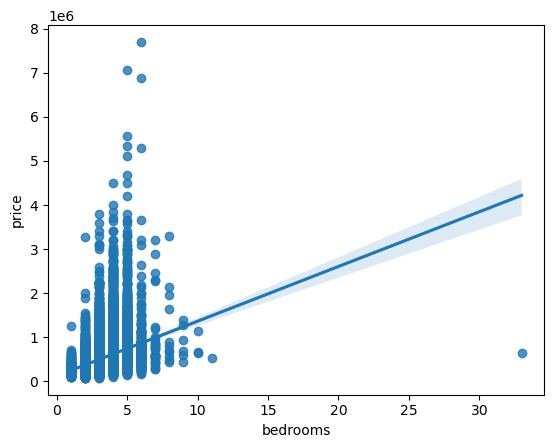

In [53]:
sns.regplot(x="bedrooms", y="price", data=data1);

In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19219 non-null  int64  
 1   price               19219 non-null  float64
 2   bedrooms            19219 non-null  int64  
 3   bathrooms           19219 non-null  float64
 4   sqft_living         19219 non-null  int64  
 5   sqft_lot            19219 non-null  int64  
 6   floors              19219 non-null  float64
 7   waterfront          19219 non-null  object 
 8   yr_built            19219 non-null  int64  
 9   condition_encoded   19219 non-null  int64  
 10  grade_encoded       19194 non-null  float64
 11  waterfront_encoded  19219 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.9+ MB


In [55]:
data1.drop('waterfront', axis = 1, inplace = True)

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19219 non-null  int64  
 1   price               19219 non-null  float64
 2   bedrooms            19219 non-null  int64  
 3   bathrooms           19219 non-null  float64
 4   sqft_living         19219 non-null  int64  
 5   sqft_lot            19219 non-null  int64  
 6   floors              19219 non-null  float64
 7   yr_built            19219 non-null  int64  
 8   condition_encoded   19219 non-null  int64  
 9   grade_encoded       19194 non-null  float64
 10  waterfront_encoded  19219 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [57]:
data1.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'condition_encoded', 'grade_encoded',
       'waterfront_encoded'],
      dtype='object')

In [58]:

from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame and you want to predict 'price'
# Drop 'price' and 'id' columns
# data1 = data1.drop(['id'], axis=1)

# Specify the columns you want to use as independent variables (X)
independent_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'condition_encoded', 'grade_encoded',
       'waterfront_encoded']

# Extract the independent variables (X) from the DataFrame
X = data1[independent_columns]

# Assuming 'target_column' is the dependent variable (y)
y = data1['price']


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 1 to 21596
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            19219 non-null  int64  
 1   bathrooms           19219 non-null  float64
 2   sqft_living         19219 non-null  int64  
 3   sqft_lot            19219 non-null  int64  
 4   floors              19219 non-null  float64
 5   yr_built            19219 non-null  int64  
 6   condition_encoded   19219 non-null  int64  
 7   grade_encoded       19194 non-null  float64
 8   waterfront_encoded  19219 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19219 non-null  int64  
 1   price               19219 non-null  float64
 2   bedrooms            19219 non-null  int64  
 3   bathrooms           19219 non-null  float64
 4   sqft_living         19219 non-null  int64  
 5   sqft_lot            19219 non-null  int64  
 6   floors              19219 non-null  float64
 7   yr_built            19219 non-null  int64  
 8   condition_encoded   19219 non-null  int64  
 9   grade_encoded       19194 non-null  float64
 10  waterfront_encoded  19219 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [69]:
data1 = data1.dropna(subset = ['grade_encoded'])

In [70]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19194 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19194 non-null  int64  
 1   price               19194 non-null  float64
 2   bedrooms            19194 non-null  int64  
 3   bathrooms           19194 non-null  float64
 4   sqft_living         19194 non-null  int64  
 5   sqft_lot            19194 non-null  int64  
 6   floors              19194 non-null  float64
 7   yr_built            19194 non-null  int64  
 8   condition_encoded   19194 non-null  int64  
 9   grade_encoded       19194 non-null  float64
 10  waterfront_encoded  19194 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [73]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_encoded,grade_encoded,waterfront_encoded
bedrooms,1.000000,0.516220,0.578219,0.029396,0.182445,0.157573,0.025033,0.355624,-0.002390
bathrooms,0.516220,1.000000,0.756350,0.085109,0.506195,0.506996,-0.126398,0.665871,0.067288
sqft_living,0.578219,0.756350,1.000000,0.173346,0.357198,0.317465,-0.057466,0.763959,0.110230
sqft_lot,0.029396,0.085109,0.173346,1.000000,-0.007220,0.055909,-0.014131,0.115452,0.023141
floors,0.182445,0.506195,0.357198,-0.007220,1.000000,0.490196,-0.263447,0.457797,0.021893
yr_built,0.157573,0.506996,0.317465,0.055909,0.490196,1.000000,-0.361941,0.444723,-0.026070
condition_encoded,0.025033,-0.126398,-0.057466,-0.014131,-0.263447,-0.361941,1.000000,-0.146867,0.017637
grade_encoded,0.355624,0.665871,0.763959,0.115452,0.457797,0.444723,-0.146867,1.000000,0.087593
waterfront_encoded,-0.002390,0.067288,0.110230,0.023141,0.021893,-0.026070,0.017637,0.087593,1.000000


In [88]:
data1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_encoded,grade_encoded,waterfront_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,3,7.0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,3,6.0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,5,7.0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,3,8.0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,2001,3,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,2008,3,8.0,0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,3,8.0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,3,8.0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,3,7.0,0


In [92]:
import statsmodels.api as sm

# Assuming your DataFrame is named 'df'
# Selecting features (independent variables) and the target variable
X = data1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition_encoded', 'grade_encoded', 'waterfront_encoded']]
y = data1['price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Creating and fitting the OLS model
model = sm.OLS(y, X).fit()

# Displaying the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3954.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:44:52   Log-Likelihood:            -2.6338e+05
No. Observations:               19194   AIC:                         5.268e+05
Df Residuals:                   19184   BIC:                         5.269e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.697e+06   1.39

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Selecting features (independent variables) and the target variable
X = data1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition_encoded', 'grade_encoded', 'waterfront_encoded']]
y = data1['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2_score(y_test, y_pred)



Mean Squared Error: 43915836979.038086


0.6726496875346561

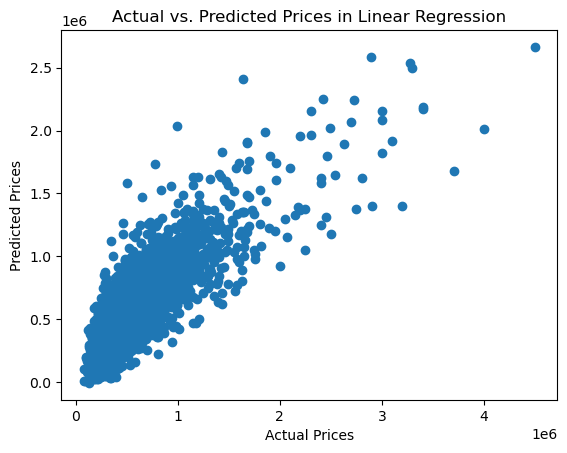

In [105]:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices in Linear Regression')
plt.show()

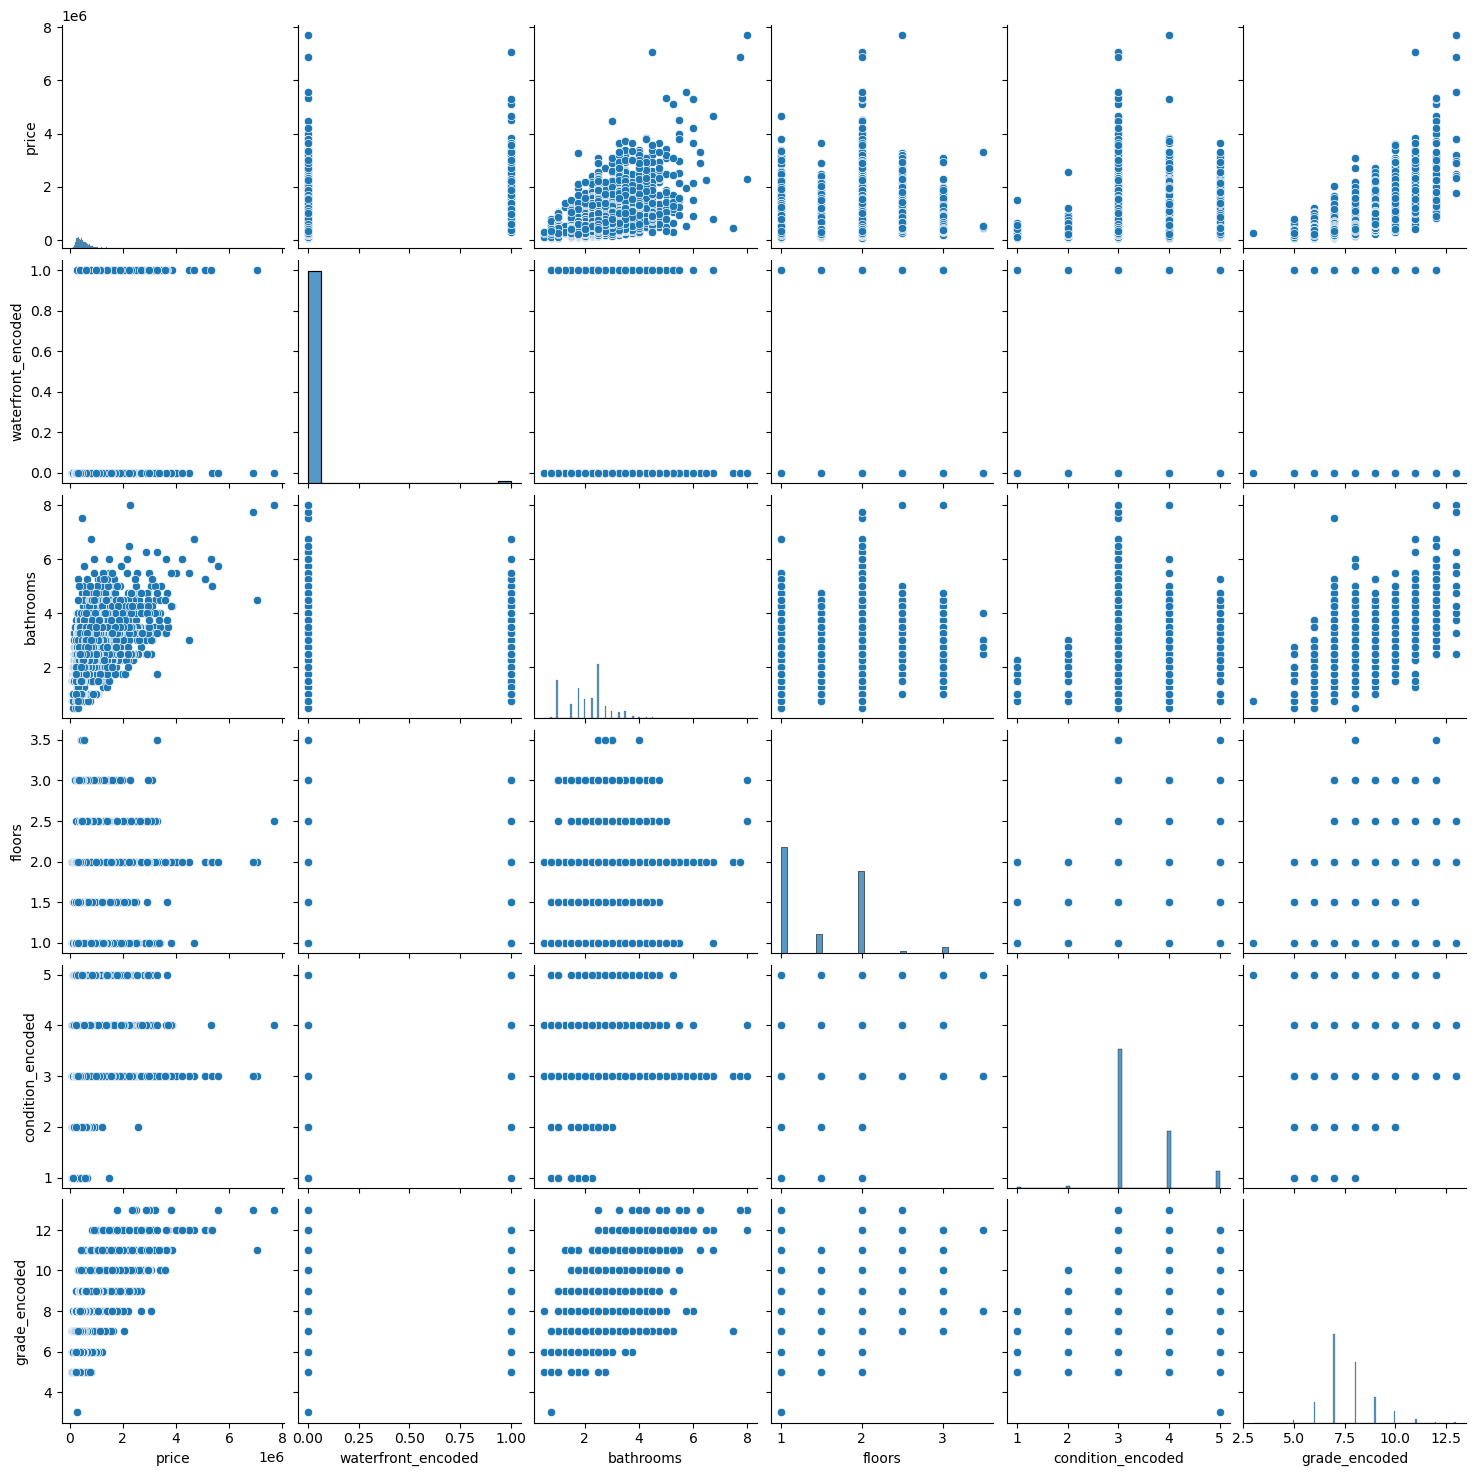

In [95]:
selected_columns = ['price', 'waterfront_encoded', 'bathrooms', 'floors', 'condition_encoded', 'grade_encoded']

# Creating a DataFrame with the selected columns
selected_data = data1[selected_columns]

# Pairplot to visualize relationships
sns.pairplot(selected_data)
plt.show()

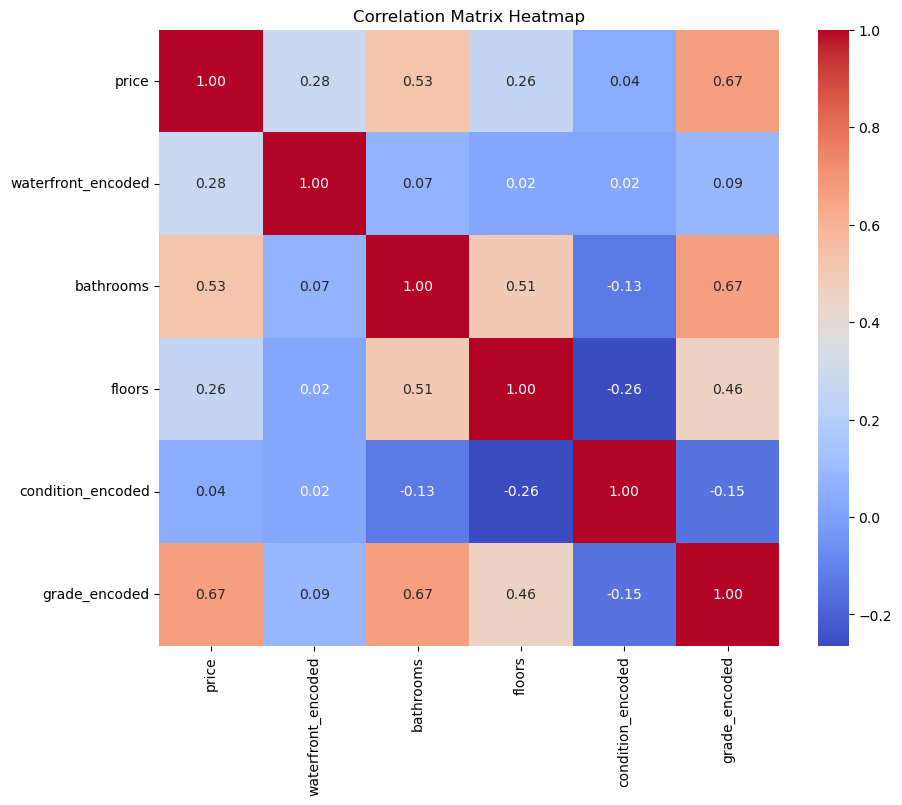

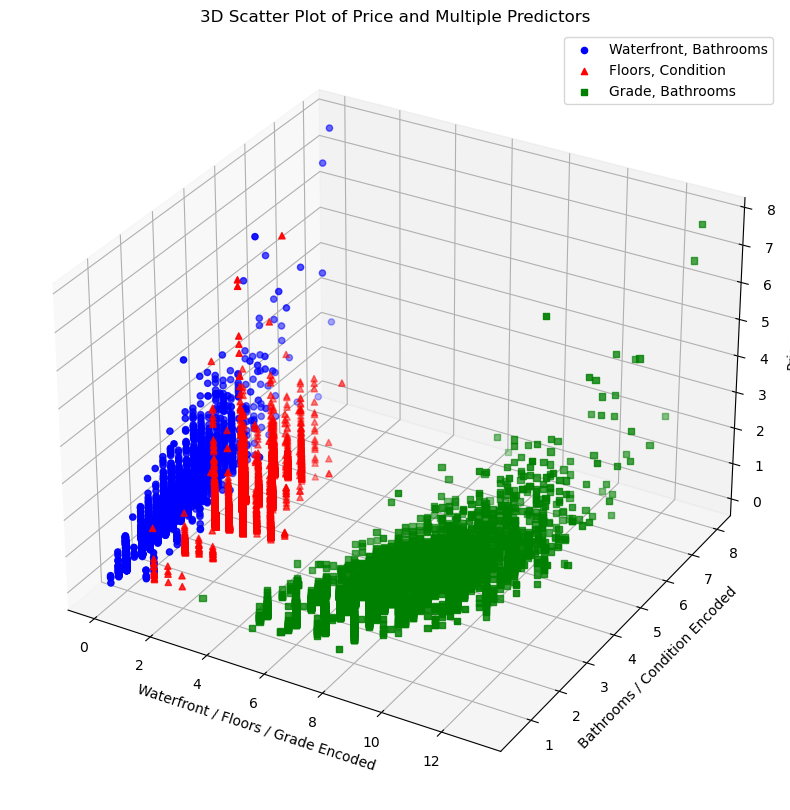

In [100]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting the columns of interest
selected_columns = ['price', 'waterfront_encoded', 'bathrooms', 'floors', 'condition_encoded', 'grade_encoded']

# Creating a DataFrame with the selected columns
selected_data = data1[selected_columns]

# Correlation Matrix Heatmap
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data['waterfront_encoded'], selected_data['bathrooms'], selected_data['price'], c='blue', marker='o', label='Waterfront, Bathrooms')
ax.scatter(selected_data['floors'], selected_data['condition_encoded'], selected_data['price'], c='red', marker='^', label='Floors, Condition')
ax.scatter(selected_data['grade_encoded'], selected_data['bathrooms'], selected_data['price'], c='green', marker='s', label='Grade, Bathrooms')

ax.set_xlabel('Waterfront / Floors / Grade Encoded')
ax.set_ylabel('Bathrooms / Condition Encoded')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Price and Multiple Predictors')
ax.legend()

plt.show()